<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/demo/python/wcci2022_gabo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GABO: Gene Analysis Base Optimization
This notebook contains the python code used for getting the results reported in the paper "GABO: Gene Analysis Base Optimization" written by Professors Jonatan Gomez and Elizabeth Leon from Universidad Nacional de Colombia and accepted in the IEEE World Congress on Computational Intelligence - WCCI 2022.

Algorithms are written using the **sgoal** library that can be obtained from the github of professor Jonatan Gomez: https://github.com/jgomezpe/. 
To run scripts in this notebook, you must clone the repository running the following script. It will create the *sgoal* folder. If you already cloned it and you do not want to update it, just skip this step:

In [1]:
!git clone https://github.com/jgomezpe/sgoal.git

Cloning into 'sgoal'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 118 (delta 10), reused 0 (delta 0), pack-reused 86
Receiving objects: 100% (118/118), 47.85 KiB | 3.42 MiB/s, done.
Resolving deltas: 100% (40/40), done.


If you have already cloned the repository with the **sgoal** library and you want to retrieve the newest one, run the following script and then run option *Restart runtime* under *Runtime* menu, otherwise skip this step:

In [2]:
%cd /content/sgoal
! git pull 

/content/sgoal
Already up to date.


Now you have to mount the *sgoal* folder and you have to add the python path to the system (add permissions to connect to drive when required):

In [7]:
from google.colab import drive
import os, sys

drive.mount('/sgoal', force_remount=True) 
# adding python to the system path
sys.path.append('/content/sgoal/python/')

Mounted at /sgoal


Now you can run each one of the algorithms on the testbed functions


##Experiments
Comparing GABO, GSC1, RMHC, SSGA, GGA, and CHAVELA

In [11]:
from binary import maxones
from binary import deceptive
from binary import boundedly
from binary import royalroad8
from binary import mixed
from binary import bitstring
from binary import bit_mutation
from binary import bitstring_population
from sgoal import simple_crossover
from sgoal import transposition
from sgoal import init
from sgoal import best_evaluation
from sgoal import success_evaluation
from sgoal import evaluations
from sgoal import stats
from binary import GSC1
from binary import RMHC
from ga import basic_binary_GGA
from ga import basic_binary_SSGA
from chavela import CHAVELA
from gabo import GABO

import pandas as pd
df = pd.DataFrame()
dfiter = pd.DataFrame()

def round(x): return (int(100*x+0.5))/100

# Paper reported values
def report(sgoal, fx, iter, budget, sr):
  sr *= 100/len(fx)
  avg, std = stats(fx)
  avg, std = round(avg), round(std)  
  avg_iter, std_iter = stats(iter)
  avg_iter, std_iter = round(avg_iter), round(std_iter)  
  avg_budget, std_budget = stats(budget)
  avg_budget, std_budget = round(avg_budget), round(std_budget)  
  print(sgoal, sr, avg, std, avg_iter, std_iter, avg_budget,  std_budget) 
  return avg, std, avg_iter, std_iter, avg_budget, std_budget

EXP = 100 # Number of experiments

D = 360 # Bitstring length
print('=================', D, '=================')

MAX_EVALS = 100*D # Maximum number of function evaluations carried on by gabo (may require less thatn those)

#Function
testbed = [maxones, deceptive, boundedly, royalroad8, mixed] # Testbed
name = ['MaxOnes','GD3','GBD4','RR1','Mixed']
FUNCTION = 4 # Testing the mixed function. Change the number accordingly
OPTIMUM = [D, 10*D, D, D, 47*D//20] # Optimum value of the associated test function

print('***************', name[FUNCTION], '***************')

print('SGOAL SR MAX STD ITER STD BUDGET STD')
fx = [] # Function value reached by the sgoal
iter = [] # Iter when the best value is reached by the sgoal
budget = [] # Number of fuction evaluations carried on by the sgoal
sr = 0 # Success rate of the sgoal

#GABO experiment
for i in range(EXP):
  init()
  y, fy = GABO(testbed[FUNCTION], MAX_EVALS, bitstring(D))
  fx.append(fy)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  iter.append(best_evaluation()[1]+1)
  budget.append(evaluations())
report('GABO', fx, iter, budget, sr)
print(fx)
df = df.assign(GABO = fx)
dfiter = dfiter.assign(GABO = iter)

#GSC1 experiment
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  y, fy = GSC1(testbed[FUNCTION], MAX_EVALS, bitstring(D))
  fx.append(fy)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  iter.append(best_evaluation()[1]+1)
  budget.append(MAX_EVALS)
report('GSC1', fx, iter, budget, sr)
print(fx)
df = df.assign(GSC1 = fx)
dfiter = dfiter.assign(GSC1 = iter)

#RMHC experiment
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  y, fy = RMHC(testbed[FUNCTION], MAX_EVALS, bitstring(D))
  fx.append(fy)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  iter.append(best_evaluation()[1]+1)
  budget.append(MAX_EVALS)
report('RMHC', fx, iter, budget, sr)
print(fx)
df = df.assign(RMHC = fx)
dfiter = dfiter.assign(RMHC = iter)

#GGA
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  P, fP, evals = basic_binary_SSGA(testbed[FUNCTION], MAX_EVALS, 100, D)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  fy, k = best_evaluation()
  fx.append(fy)
  iter.append(k+1)
  budget.append(MAX_EVALS)
report('SSGA', fx, iter, budget, sr)
print(fx)
df = df.assign(SSGA = fx)
dfiter = dfiter.assign(SSGA = iter)

#GGA
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  P, fP, evals = basic_binary_GGA(testbed[FUNCTION], MAX_EVALS, 100, D)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  fy, k = best_evaluation()
  fx.append(fy)
  iter.append(k+1)
  budget.append(MAX_EVALS)
report('GGA', fx, iter, budget, sr)
print(fx)
df = df.assign(GGA = fx)
dfiter = dfiter.assign(GGA = iter)

#CHAVELA
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  P, fP, evals, rates = CHAVELA(testbed[FUNCTION], MAX_EVALS, [simple_crossover, bit_mutation, transposition], bitstring_population(100,D))
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  fy, k = best_evaluation()
  fx.append(fy)
  iter.append(k+1)
  budget.append(MAX_EVALS)
report('CHAVELA', fx, iter, budget, sr)
print(fx)
df = df.assign(CHAVELA = fx)
dfiter = dfiter.assign(CHAVELA = iter)

================= 120 =================
*************** Mixed ***************
SGOAL SR MAX STD ITER STD BUDGET STD
GABO 50.0 274.8 8.35 7638.0 2060.54 12000.0 0.0
[266, 282, 282, 266, 282, 274, 258, 282, 282, 274]
GSC1 0.0 208.8 2.36 11999.0 0.0 12000.0 0.0
[214, 209, 209, 207, 207, 209, 211, 210, 206, 206]
RMHC 0.0 261.8 6.52 8878.2 1319.92 12000.0 0.0
[268, 250, 256, 259, 268, 272, 260, 268, 259, 258]
SSGA 0.0 245.7 7.34 4692.7 2807.79 12000.0 0.0
[248, 235, 259, 252, 244, 246, 246, 252, 234, 241]
GGA 0.0 253.5 10.56 7670.7 2548.43 12000.0 0.0
[262, 247, 246, 260, 230, 252, 261, 259, 249, 269]
CHAVELA 30.0 276.3 6.12 10928.1 1193.9 12000.0 0.0
[282, 281, 272, 282, 280, 265, 268, 272, 282, 279]


Plotting statistical information. If you want to store images, first connect to your drive, define a folder where to store images (here we use the folder's name /sgoal/MyDrive/WCCI_2022/), and uncomment file relative code lines:

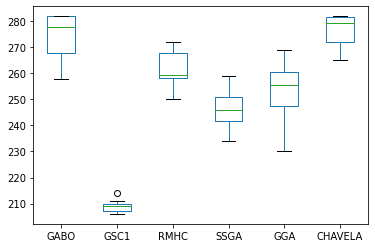

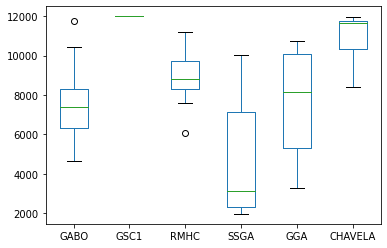

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#path = "/sgoal/MyDrive/WCCI_2022/"

myFig = plt.figure();
df.boxplot(grid=False) 
#figName= path+name[FUNCTION] + str(D) + ".png"
#myFig.savefig(figName, format="png")


myFig = plt.figure();
dfiter.boxplot(grid=False) 
#figName= path+name[FUNCTION] + str(D) + "_iter.png"
#myFig.savefig(figName, format="png")